# Quick Implimentation of Word Shifts. 
If you want to do it on semtiment words, make the sentiment words seperately with the module in the repo and load the json

In [1]:
import shifterator as sh
import pandas as pd
import numpy as np
import sys
import nltk
nltk.download('punkt')
import tqdm

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/suvivarshney/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
spch = pd.read_csv('archive/corpus.csv')

## Word_Search

In [15]:
tmp = spch[spch['Unnamed: 0']=='John F. Kennedy']['transcripts'][33]

In [20]:
tmp.lower().rfind('health insurance')

430399

In [22]:
tmp[430299:430599]

't, death, and disability. I now urge that its coverage be extended without further delay to provide health insurance for the elderly. Equally important to our strength is the quality of our education. Eight million adult Americans are classified as functionally illiterate. This is a disturbing figur'

In [24]:
tmp = spch[spch['Unnamed: 0']=='Ronald Reagan']['transcripts'][38]

In [25]:
tmp.lower().rfind('7 years')

1033074

In [29]:
tmp[1032550:1033999]

" Earth. At the start of this decade, I suggested that we live in equally momentous times, that it is up to us now to decide whether our form of government would endure and whether history still had a place of greatness for a quiet, pleasant, greening land called America. Not everything has been made perfect in 7 years, nor will it be made perfect in seven times 70 years, but before us, this year and beyond, are great prospects for the cause of peace and world freedom. It means, too, that the young Americans I spoke of 7 years ago, as well as those who might be coming along the Virginia or Maryland shores this night and seeing for the first time the lights of this Capital City, the lights that cast their glow on our great halls of government and the monuments to the memory of our great men, it means those young Americans will find a city of hope in a land that is free. We can be proud that for them and for us, as those lights along the Potomac are still seen this night signaling as the

## Shiftrator

In [3]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/suvivarshney/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## JFK v/s GWB

In [38]:
tmp = spch[spch['Unnamed: 0']=='John F. Kennedy']['transcripts'][33]
unwanted_chars = ".,-_\'?"
type2freq_1 = {}
tmp = tmp.split(' ')
for raw_word in tmp:
    word = raw_word.strip(unwanted_chars)
    if word not in type2freq_1:
        type2freq_1[word] = 0 
    type2freq_1[word] += 1

In [39]:
tmp = spch[spch['Unnamed: 0']=='George W. Bush']['transcripts'][41]
unwanted_chars = ".,-_\'?"
type2freq_2 = {}
tmp = tmp.split(' ')
for raw_word in tmp:
    word = raw_word.strip(unwanted_chars)
    if word not in type2freq_2:
        type2freq_2[word] = 0 
    type2freq_2[word] += 1

/Users/suvivarshney/opt/anaconda3/lib/python3.8/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


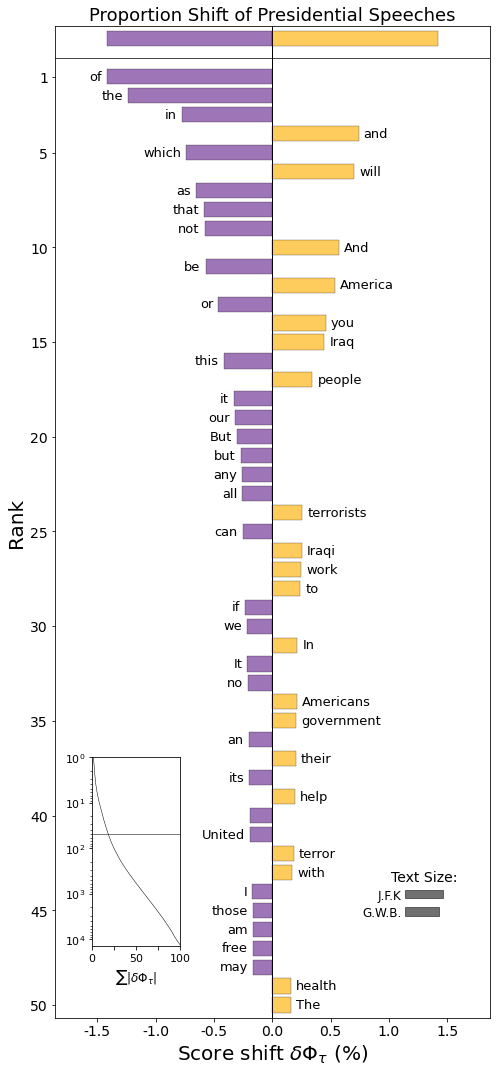

<AxesSubplot:title={'center':'Proportion Shift of Presidential Speeches'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [42]:
proportion_shift = sh.ProportionShift(type2freq_1=type2freq_1,
                                      type2freq_2=type2freq_2)
proportion_shift.get_shift_graph(system_names = ['J.F.K', 'G.W.B'],
                                 title='Proportion Shift of Presidential Speeches')

/Users/suvivarshney/opt/anaconda3/lib/python3.8/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


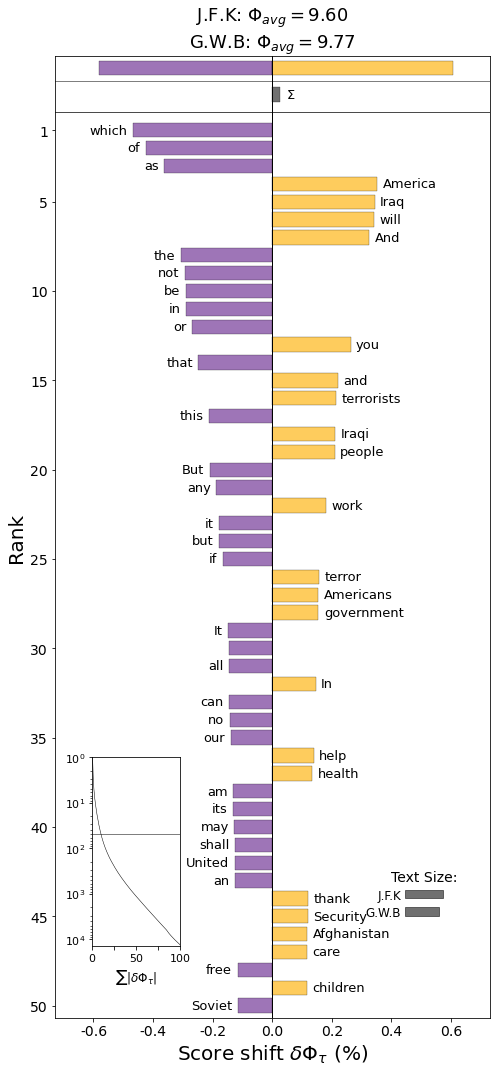

<AxesSubplot:title={'center':'J.F.K: $\\Phi_{avg}=$9.60\nG.W.B: $\\Phi_{avg}=$9.77'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [43]:
entropy_shift = sh.EntropyShift(type2freq_1=type2freq_1,
                                type2freq_2=type2freq_2,
                                base=2)
entropy_shift.get_shift_graph(system_names = ['J.F.K', 'G.W.B'])

/Users/suvivarshney/opt/anaconda3/lib/python3.8/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


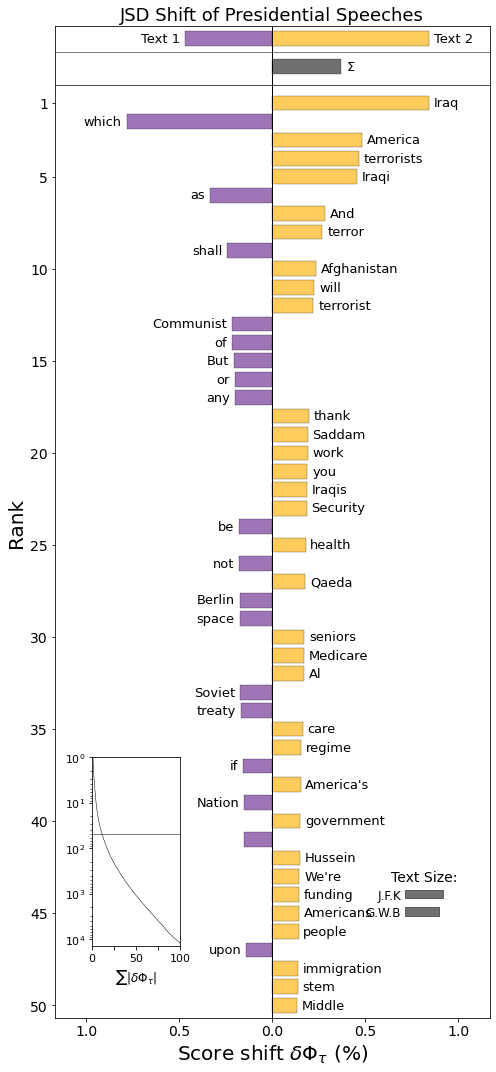

<AxesSubplot:title={'center':'JSD Shift of Presidential Speeches'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [44]:
jsd_shift = sh.JSDivergenceShift(type2freq_1=type2freq_1,
                                 type2freq_2=type2freq_2,
                                 weight_1=0.5,
                                 weight_2=0.5,
                                 base=2,
                                 alpha=1)
jsd_shift.get_shift_graph(system_names = ['J.F.K', 'G.W.B'],
                          title='JSD Shift of Presidential Speeches')

## BHO v/s DJT

In [192]:
tmp = spch[spch['Unnamed: 0']=='Barack Obama']['transcripts'][42]
tmp.lower().rfind('health')

1154280

In [194]:
tmp[1154050:1154500]

'andle bias and discrimination, and here at Rutgers, helped found the Muslim Public Relations Council to work with administrators and police to promote inclusion. Look at somebody like Madison Little, who grew up dealing with some health issues, and started wondering what his care would have been like if he lived someplace else, and so, here at Rutgers, he took charge of a student nonprofit and worked with folks in Australia and Cambodia and Ugand'

In [197]:
tmp = spch[spch['Unnamed: 0']=='Donald Trump']['transcripts'][43]
tmp.lower().rfind('weapon')

423938

In [200]:
tmp[423838:424000]

"s and the means to deliver them. We must never allow this to happen. To stop Iran's path to nuclear weapons and missiles, I withdrew the United States from the te"

In [126]:
tmp = spch[spch['Unnamed: 0']=='Barack Obama']['transcripts'][42]
unwanted_chars = ".,-_\'?)(;\"$:"
unwanted_chars_list = ['.',',','-','_','\'','?','\\','/','\"','(',')',';','$','#','”','“','','-','a','s','t','re','n\'t','II']
tmp = tmp.lower()
tmp = tmp.strip(unwanted_chars)
text_tokens = word_tokenize(tmp)
tokens_without_sw = [word for word in tqdm.tqdm(text_tokens) if not word in stopwords.words() and not word in unwanted_chars_list]
type2freq_1 = {}
for raw_word in tokens_without_sw:
    word = raw_word.strip(unwanted_chars)
    if word not in type2freq_1:
        type2freq_1[word] = 0 
    type2freq_1[word] += 1

100%|██████████| 232078/232078 [29:17<00:00, 132.04it/s]  


In [127]:
tmp = spch[spch['Unnamed: 0']=='Donald Trump']['transcripts'][43]
unwanted_chars = ".,-_\'?)(;\"$:"
unwanted_chars_list = ['.',',','-','_','\'','?','\\','/','\"','(',')',';','$','#','”','“','','-','a','s','t','re','n\'t','II']
tmp = tmp.lower()
tmp = tmp.strip(unwanted_chars)
text_tokens = word_tokenize(tmp)
tokens_without_sw = [word for word in tqdm.tqdm(text_tokens) if not word in stopwords.words() and not word in unwanted_chars_list]
type2freq_2 = {}
for raw_word in tokens_without_sw:
    word = raw_word.strip(unwanted_chars)
    if word not in type2freq_2:
        type2freq_2[word] = 0 
    type2freq_2[word] += 1

100%|██████████| 99565/99565 [04:38<00:00, 357.33it/s]


/Users/suvivarshney/opt/anaconda3/lib/python3.8/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


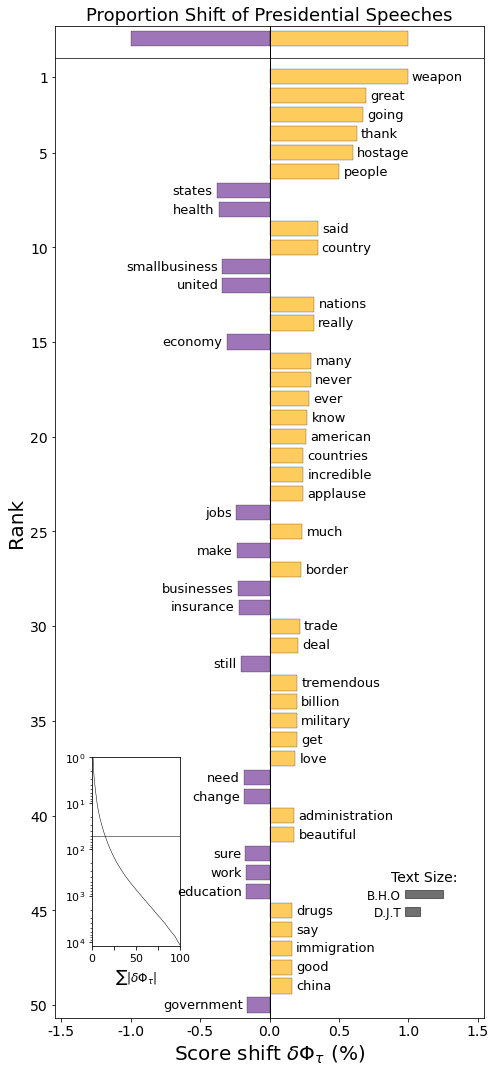

<AxesSubplot:title={'center':'Proportion Shift of Presidential Speeches'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [189]:
proportion_shift = sh.ProportionShift(type2freq_1=type2freq_1,
                                      type2freq_2=type2freq_2)
proportion_shift.get_shift_graph(system_names = ['B.H.O', 'D.J.T'],
                                 title='Proportion Shift of Presidential Speeches')

/Users/suvivarshney/opt/anaconda3/lib/python3.8/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


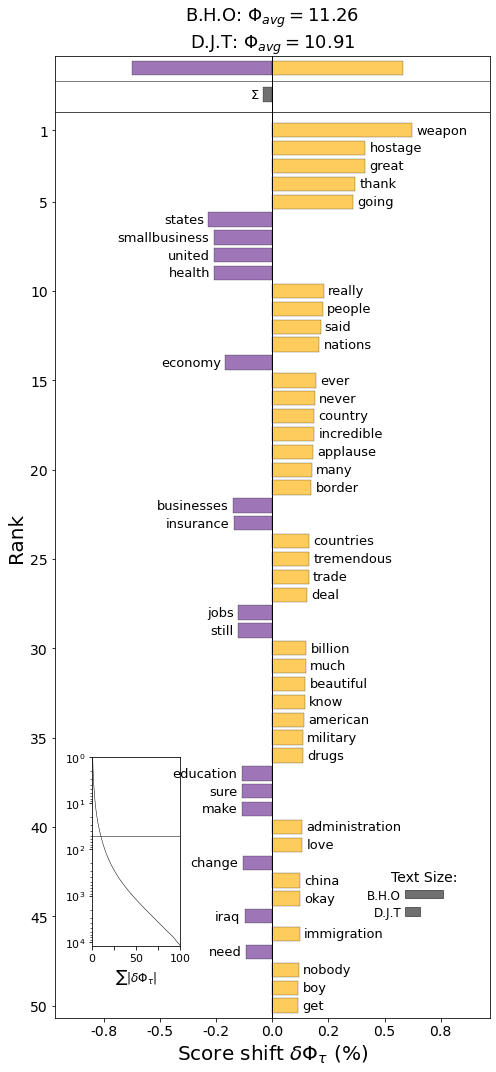

<AxesSubplot:title={'center':'B.H.O: $\\Phi_{avg}=$11.26\nD.J.T: $\\Phi_{avg}=$10.91'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [190]:
entropy_shift = sh.EntropyShift(type2freq_1=type2freq_1,
                                type2freq_2=type2freq_2,
                                base=2)
entropy_shift.get_shift_graph(system_names = ['B.H.O', 'D.J.T'])

/Users/suvivarshney/opt/anaconda3/lib/python3.8/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


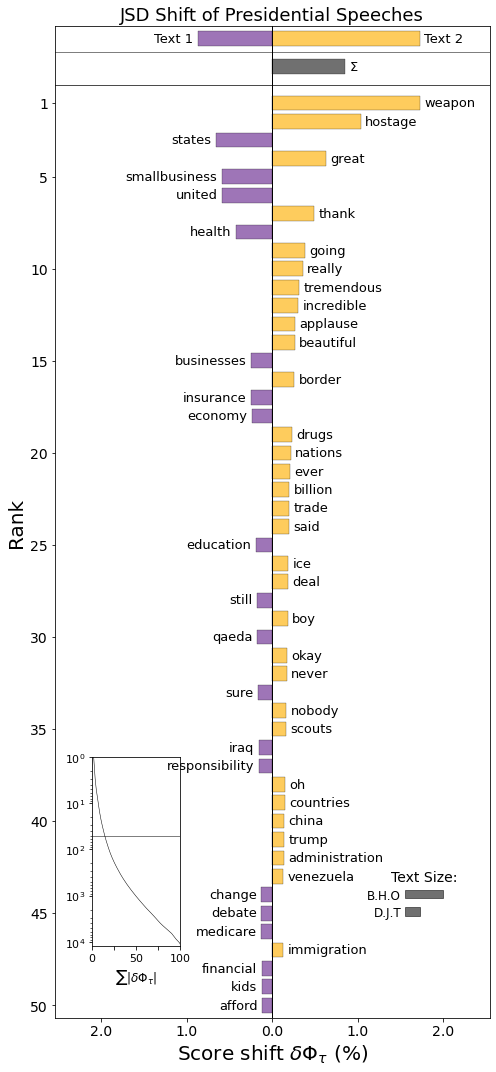

<AxesSubplot:title={'center':'JSD Shift of Presidential Speeches'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [191]:
jsd_shift = sh.JSDivergenceShift(type2freq_1=type2freq_1,
                                 type2freq_2=type2freq_2,
                                 weight_1=0.5,
                                 weight_2=0.5,
                                 base=2,
                                 alpha=1)
jsd_shift.get_shift_graph(system_names = ['B.H.O', 'D.J.T'],
                          title='JSD Shift of Presidential Speeches')

## BHO vs DJT Without Sentiment

In [201]:
tmp = spch[spch['Unnamed: 0']=='Barack Obama']['transcripts'][42]
unwanted_chars = ".,-_\'?)(;\"$:"
unwanted_chars_list = ['.',',','-','_','\'','?','\\','/','\"','(',')',';','$','#','”','“','','-','a','s','t','re','n\'t','II']
tmp = tmp.lower()
tmp = tmp.strip(unwanted_chars)
text_tokens = word_tokenize(tmp)
tokens_without_sw = [word for word in tqdm.tqdm(text_tokens) if not word in stopwords.words() and not word in unwanted_chars_list]
type2freq_1 = {}
for raw_word in text_tokens:
    word = raw_word.strip(unwanted_chars)
    if word not in type2freq_1:
        type2freq_1[word] = 0 
    type2freq_1[word] += 1

100%|██████████| 232078/232078 [10:56<00:00, 353.52it/s]


In [202]:
tmp = spch[spch['Unnamed: 0']=='Donald Trump']['transcripts'][43]
unwanted_chars = ".,-_\'?)(;\"$:"
unwanted_chars_list = ['.',',','-','_','\'','?','\\','/','\"','(',')',';','$','#','”','“','','-','a','s','t','re','n\'t','II']
tmp = tmp.lower()
tmp = tmp.strip(unwanted_chars)
text_tokens = word_tokenize(tmp)
tokens_without_sw = [word for word in tqdm.tqdm(text_tokens) if not word in stopwords.words() and not word in unwanted_chars_list]
type2freq_2 = {}
for raw_word in text_tokens:
    word = raw_word.strip(unwanted_chars)
    if word not in type2freq_2:
        type2freq_2[word] = 0 
    type2freq_2[word] += 1

100%|██████████| 99565/99565 [04:44<00:00, 349.76it/s]


/Users/suvivarshney/opt/anaconda3/lib/python3.8/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


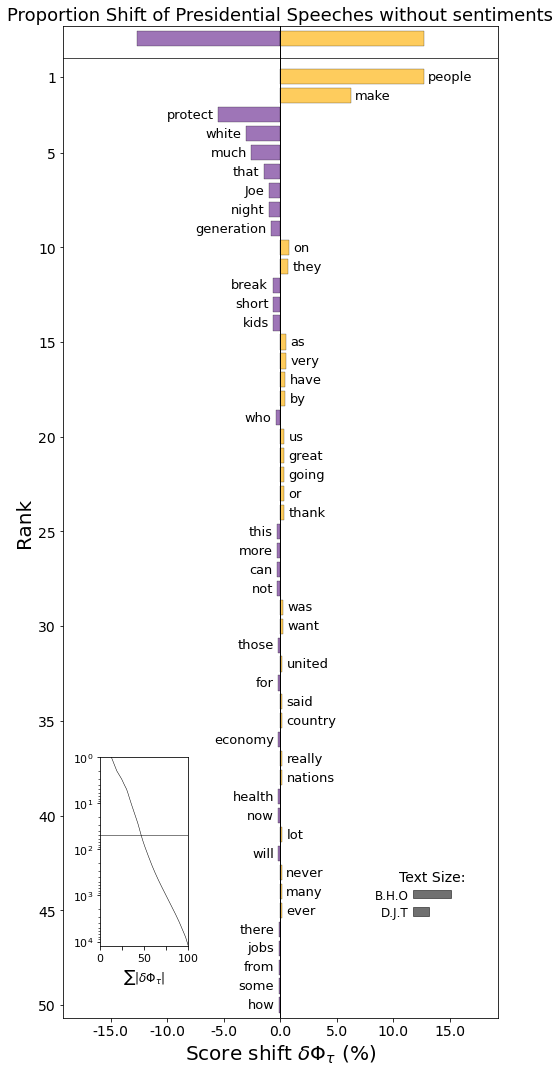

<AxesSubplot:title={'center':'Proportion Shift of Presidential Speeches without sentiments'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [306]:
proportion_shift = sh.ProportionShift(type2freq_1=type2freq_1,
                                      type2freq_2=type2freq_2)
proportion_shift.get_shift_graph(system_names = ['B.H.O', 'D.J.T'],
                                 title='Proportion Shift of Presidential Speeches without sentiments')

/Users/suvivarshney/opt/anaconda3/lib/python3.8/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


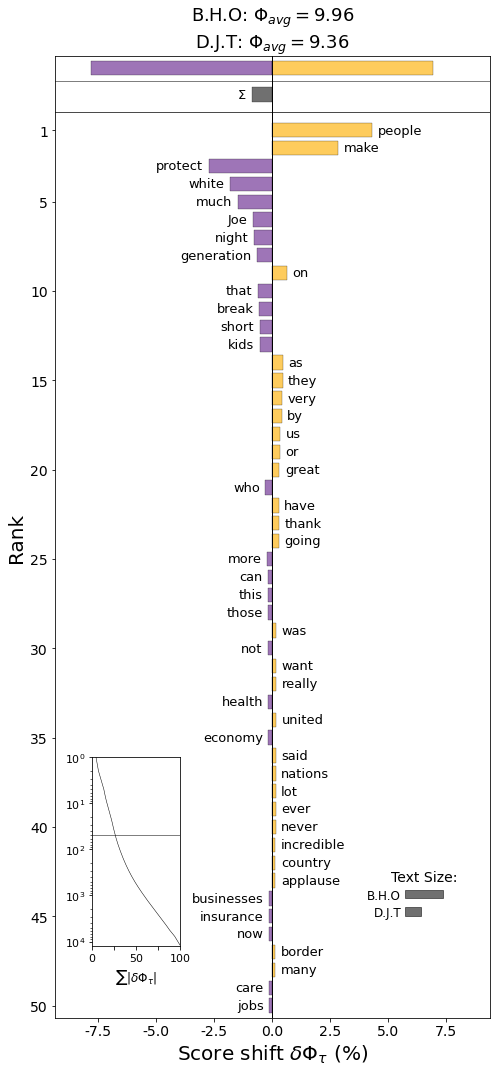

<AxesSubplot:title={'center':'B.H.O: $\\Phi_{avg}=$9.96\nD.J.T: $\\Phi_{avg}=$9.36'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [307]:
entropy_shift = sh.EntropyShift(type2freq_1=type2freq_1,
                                type2freq_2=type2freq_2,
                                base=2)
entropy_shift.get_shift_graph(system_names = ['B.H.O', 'D.J.T'])

/Users/suvivarshney/opt/anaconda3/lib/python3.8/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


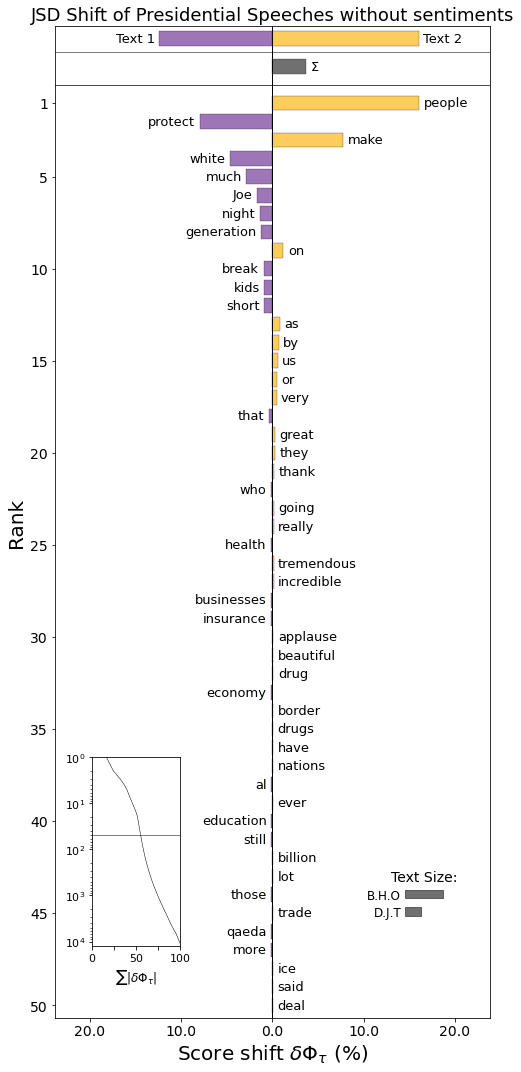

<AxesSubplot:title={'center':'JSD Shift of Presidential Speeches without sentiments'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [308]:
jsd_shift = sh.JSDivergenceShift(type2freq_1=type2freq_1,
                                 type2freq_2=type2freq_2,
                                 weight_1=0.5,
                                 weight_2=0.5,
                                 base=2,
                                 alpha=1)
jsd_shift.get_shift_graph(system_names = ['B.H.O', 'D.J.T'],
                          title='JSD Shift of Presidential Speeches without sentiments')

## 

## Comparing Assignment10 DVAO (Deep Volumetric Ambient Occlusions)

In [31]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/suvivarshney/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
strX1 = 'Through this work, the authors introduce a NN based learning for volumetric illumination through various modalities. They propose strategies to train 3D CNNs to enable them to compute volumetric ambient occlusions, by focusing on the transfer function. The outline of the contributions are:1. Introduction of novel DVAO to predict volumetric ambient occlusions in DVR using 3D CNNs. 2 Strategies to apply CNN on unstructured information, focusing on the transfer function3. Evaluation of DVAO and its generalization beyond their specific application. 4. Layout of guidelines for the application of CNNs in volumetric visualization. hey visualize the volumetric and occlusion information through 3D rendering techniques, providing us with various snapshot images of the results, comparing them with the ground truth and traditional algorithms. They use CNNs to learn ambient occlusions, using various encoders and decoders. The input is the volume information of size 1283x1, encoded to 13x512, and finally, the output is decoded 1283x1 occlusion information. They use 2 different transfer functions described in the paper. They also describe the injection strategies for the data passed through the transfer functions in detail. They train their model in a supervised learning method using stochastic gradient descent and define the loss function for their method. They also compare their evaluation to traditional benchmark algorithms like LAO-190 and LAO-32. 1 Through their novel work on DVAO, the authors detail the application of CNNs on DVR for ambient occlusions as one of the initial works.2 Their module can be easily integrated with the existing information using a simple texture lookup. 3 When it catches up to the performance metrics of traditional algorithms, this method will be faster in inference once trained. 4 Their use of implicit representation makes computation easier because the transfer function is not applied on the top of the illumination task. 1 They represent their work on low-resolution volumes of the size 1283x1 due to computational constraints. The number of parameters of CNN explodes as the dimensions of the volume increase. 2 Their method, being one of the early works, is still behind in accuracy compared to traditional methods, and results are often in disagreement with the ground truth. 3 While using implicit representation, the CNNs can’t be trained on the raw data and features have to be generated before providing input.  The current method lacks in performance and accuracy when compared to traditional methods, but the authors hope that there will be future work on DVR and GI using DL. To increase the resolution of volumetric information, they hope to work with splitted volume sections in the future. As the authors mention that they will work with splitted volume sections for better resolution, will the different volume sections hinder the ambient occlusions of one particular section when processed independently? If so, can this be resolved with an additional DL model to learn spatial orientation?'

In [39]:
strX2 = 'The authors offered a groundbreaking deep learning-based approach for volumetric ambient occlusion in the context of direct volume rendering in this study. Since Direct volume rendering (DVR) requires additional global information, in the form of the transfer function, authors studied ways for injecting such unstructured global data information into 3D convolutional neural networks in order to calculate volumetric ambient occlusion. The Deep Volumetric Ambient Occlusion (DVAO) method they present can predict per-voxel ambient occlusion in volumetric data sets while taking global information from the transfer function into account. There are 4 major contributions by the authors of this paper: 1. By leveraging a 3D CNN, they propose DVAO, a unique method for predicting volumetric ambient occlusion during interactive DVR. 2. They compare and contrast several representations and injection methodologies for delivering global unstructured information to the CNN when applied to transfer function data. 3. In a comprehensive review, they show that DVAOs impact extends beyond the structures and modalities encountered during training. 4. They provide guidelines that may be used in a variety of volume visualization learning settings. Authors use 3D volume rendering and show the results trained with different loss functions. The challenge of volumetric ambient occlusion is framed as a problem of supervised learning. To predict volumetric ambient occlusion, they train a 3D convolutional neural network. Once predictions have been made, this technique may simply be incorporated into current DVR pipelines by adding a simple texture lookup. Its an excellent beginning point for volumetric illumination based on deep learning, and it has a lot of room for improvement with more study. Their explicit TF methods can greatly reduce running time. Because 3D CNNs become too computationally costly at higher resolutions and are rapidly constrained by GPU capacity, the current technique is confined to relatively low-resolution volumes of size 1283. They cant make predictions for each frame since it would take too long, so they only anticipate a new ambient occlusion volume once the transfer function is modified. In the future, this work can be expanded the applicability to a larger range of GI effects in the future, including higher frequency effects. Splitting volumes into smaller bricks might be a promising path for future research to improve prediction resolution. Because the currently best-performing representation is highly costly during inference, more research on improved transfer function representations is still needed. What effect will including additional unstructured global data like camera parameters have on the speed of the existing model?'

In [54]:
unwanted_chars = ".,-_\'?)(;\"$:"
unwanted_chars_list = ['.',',','-','_','\'','?','\\','/','\"','(',')',';','$','#','”','“','','-','a','s','t','re','n\'t','II','1','2','3','4','5','6','7','8','9','0']
tmp = strX1.lower()
tmp = tmp.strip(unwanted_chars)
text_tokens = word_tokenize(tmp)
tokens_without_sw = [word for word in tqdm.tqdm(text_tokens) if not word in stopwords.words() and not word in unwanted_chars_list]
type2freq_1 = {}
for raw_word in tokens_without_sw:
    word = raw_word.strip(unwanted_chars)
    if word not in type2freq_1:
        type2freq_1[word] = 0 
    type2freq_1[word] += 1

100%|██████████| 516/516 [00:01<00:00, 363.48it/s]


In [56]:
unwanted_chars = ".,-_\'?)(;\"$:"
unwanted_chars_list = ['.',',','-','_','\'','?','\\','/','\"','(',')',';','$','#','”','“','','-','a','s','t','re','n\'t','II','1','2','3','4','5','6','7','8','9','0']
tmp = strX2.lower()
tmp = tmp.strip(unwanted_chars)
text_tokens = word_tokenize(tmp)
tokens_without_sw = [word for word in tqdm.tqdm(text_tokens) if not word in stopwords.words() and not word in unwanted_chars_list]
type2freq_2 = {}
for raw_word in tokens_without_sw:
    word = raw_word.strip(unwanted_chars)
    if word not in type2freq_2:
        type2freq_2[word] = 0 
    type2freq_2[word] += 1

100%|██████████| 444/444 [00:01<00:00, 368.91it/s]


/Users/suvivarshney/opt/anaconda3/lib/python3.8/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


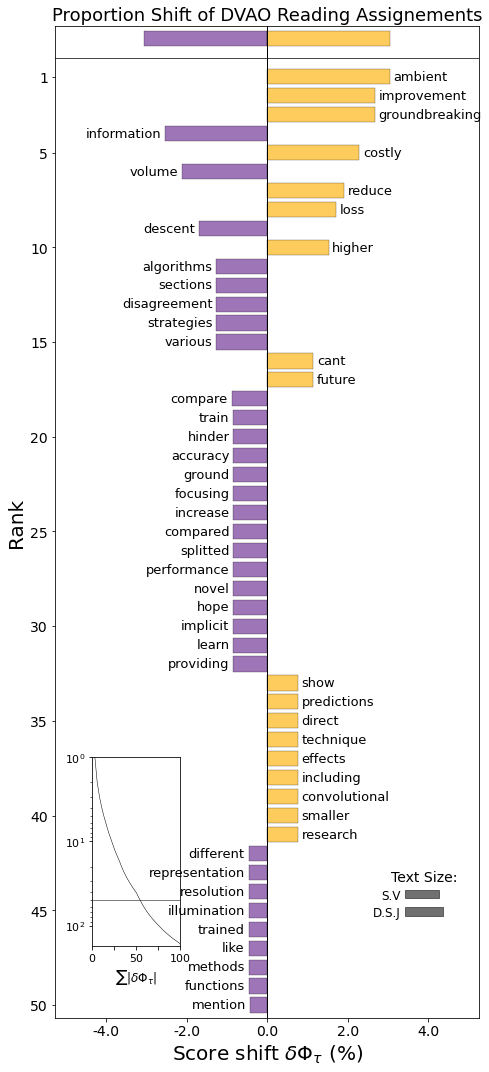

<AxesSubplot:title={'center':'Proportion Shift of DVAO Reading Assignements'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [113]:
proportion_shift = sh.ProportionShift(type2freq_1=type2freq_1,
                                      type2freq_2=type2freq_2)
proportion_shift.get_shift_graph(system_names = ['S.V', 'D.S.J'],
                                 title='Proportion Shift of DVAO Reading Assignements')

/Users/suvivarshney/opt/anaconda3/lib/python3.8/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


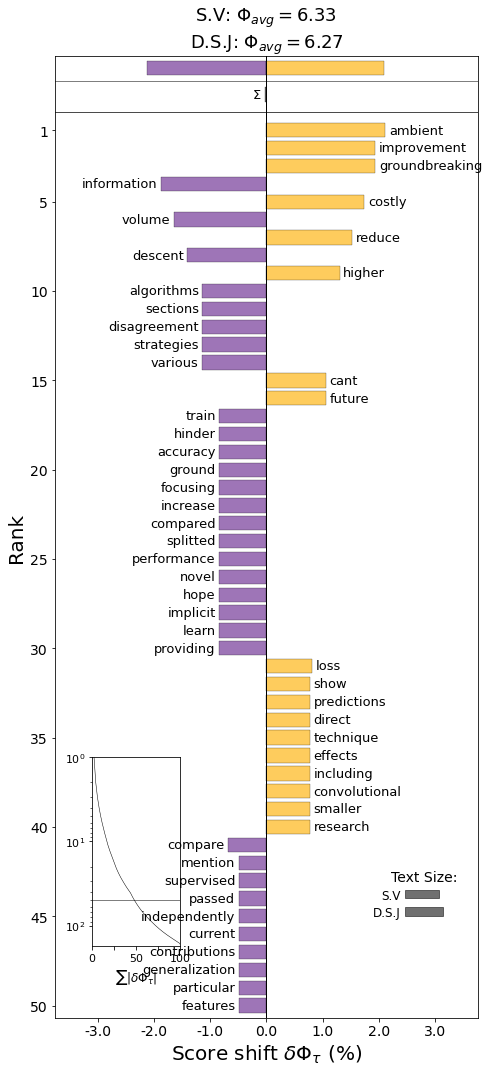

<AxesSubplot:title={'center':'S.V: $\\Phi_{avg}=$6.33\nD.S.J: $\\Phi_{avg}=$6.27'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [110]:
entropy_shift = sh.EntropyShift(type2freq_1=type2freq_1,
                                type2freq_2=type2freq_2,
                                base=2)
entropy_shift.get_shift_graph(system_names = ['S.V', 'D.S.J'])

/Users/suvivarshney/opt/anaconda3/lib/python3.8/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


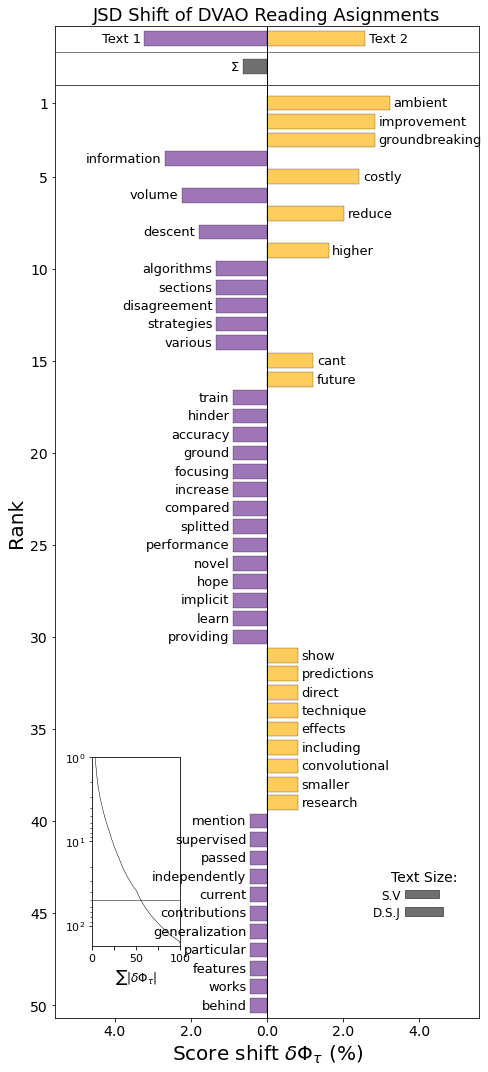

<AxesSubplot:title={'center':'JSD Shift of DVAO Reading Asignments'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [112]:
jsd_shift = sh.JSDivergenceShift(type2freq_1=type2freq_1,
                                 type2freq_2=type2freq_2,
                                 weight_1=0.5,
                                 weight_2=0.5,
                                 base=2,
                                 alpha=1)
jsd_shift.get_shift_graph(system_names = ['S.V', 'D.S.J'],
                          title='JSD Shift of DVAO Reading Asignments')

## Batman Reviews

In [65]:
strB1= '“The Batman” isn’t a superhero movie. Not really. All the trappings are there: the Batmobile, the rugged suit, the gadgets courtesy of trusty butler Alfred. And of course, at the center, is the Caped Crusader himself: brooding, tormented, seeking his own brand of nighttime justice in a Gotham City that’s spiraling into squalor and decay. But in Reeves’ confident hands, everything is breathtakingly alive and new. As director and co-writer, he’s taken what might seem like a familiar tale and made it epic, even operatic. His “Batman” is more akin to a gritty, ‘70s crime drama than a soaring and transporting blockbuster. With its kinetic, unpredictable action, it calls to mind films like “The Warriors” as well as one of the greatest of them all in the genre, “The French Connection.” And with a series of high-profile murders driving the plot, it sometimes feels as if the Zodiac killer is terrorizing the citizens of Gotham. And yet, despite these touchstones, this is unmistakably a Matt Reeves film. He accomplishes here what he did with his gripping entries in the “Planet of the Apes” franchise: created an electrifying, entertaining spectacle, but one that’s grounded in real, emotional stakes. This is a Batman movie that’s aware of its own place within pop culture, but not in winking, meta fashion; rather, it acknowledges the comic book character’s lore, only to examine it and reinvent it in a way that’s both substantial and daring. The script from Reeves and Peter Craig forces this hero to question his history as well as confront his purpose, and in doing so, creates an opening for us as viewers to challenge the narratives we cling to in our own lives. And with Robert Pattinson taking over the role of Bruce Wayne, we have an actor who’s not just prepared but hungry to explore this figure’s weird, dark instincts. This is not the dashing heir to a fortune prowling about, kicking ass in a cool costume. This is Travis Bickle in the Batsuit, detached and disillusioned. He’s two years into his tenure as Batman, tracking criminals from on high in Wayne Tower—an inspired switch from the usual sprawl of Wayne Manor, suggesting an even greater isolation from society. “They think I’m hiding in the shadows,” he intones in an opening voiceover. “But I am the shadows.” In the harsh light of day, Pattinson gives us hungover indie rock star vibes. But at night, you can see the rush he gets from swooping in and executing his version of vengeance, even beneath the tactical gear and eye black. As he’s shown in pretty much every role hes taken since Twilight made him a global superstar in 2008, working with singular auteurs from David Cronenberg to Claire Denis to the Safdie brothers, Pattinson is at his best when he’s playing characters who make you uncomfortable. Even more than Christian Bale in the role, Pattinson is so skilled at making his beautiful, angular features seem unsettling. So when he first spies on the impossibly sexy Zoe Kravitz as Selina Kyle, slinking into her leather motorcycle gear and shimmying down the fire escape in her own pursuit of nocturnal justice, there’s an unmistakable flicker of a charge in his eyes: Ooh. She’s a freak like me. Pattinson and Kravitz have insane chemistry with each other. She is his match, physically and emotionally, every step of the way. This is no flirty, purring Catwoman: She’s a fighter and a survivor with a loyal heart and a strong sense of what’s right. Following her lead role in Steven Soderbergh’s high-tech thriller “Kimi,” Kravitz continues to reveal a fierce charisma and quiet strength. She’s part of a murderer’s row of supporting performers, all of whom get meaty roles to play. Jeffrey Wright is the rare voice of idealism and decency as the eventual Commissioner Gordon. John Turturro is low-key chilling as crime boss Carmine Falcone. Andy Serkis—Caesar in Reeves’ “Apes” movies—brings a paternal wisdom and warmth as Alfred. Colin Farrell is completely unrecognizable as the sleazy, villainous Oswald Cobblepot, better known as The Penguin. And Paul Dano is flat-out terrifying as The Riddler, whose own drive for vengeance provides the story’s spine. He goes to extremes here in a way that’s reminiscent of his startling work in “There Will Be Blood.” His derangement is so intense, you may find yourself unexpectedly laughing just to break the tension he creates. But there’s nothing amusing about his portrayal; Dano makes you feel as if you’re watching a man who’s truly, deeply disturbed. This is not to say that “The Batman” is a downer; far from it. Despite the overlong running time of nearly three hours, this is a film that’s consistently viscerally gripping. The coolest Batmobile yet—a muscular vehicle that’s straight out of “Mad Max: Fury Road”—figures prominently in one of the movie’s most heart-pounding sequences. It’s an elaborate car chase and chain-reaction crash ending with an upside-down shot of fiery fury that literally had me applauding during my screening. During a fight at a thumping night club, punctuated by pulsating red lights, you can feel every punch and kick. (That’s one of the more compelling elements of seeing this superhero in his early days: He isn’t invincible.) And a shootout in a pitch-black hallway, illuminated only by the blasts of shotgun fire, is both harrowing and dazzling. Greatly magnifying the power of scenes like these is the score from veteran composer Michael Giacchino. Best known for his Pixar movie music, he does something totally different with “The Batman”: percussive and horn-heavy, it is massive and demanding, and you will feel it deep in your core. Working with artists and craftspeople operating at the top of their game, Reeves has made a movie that manages to be ethereal yet weighty at the same time, substantial yet impressionistic. Cinematographer Greig Fraser pulls off the same sort of stunning magic trick he did with his Oscar-nominated work in Denis Villeneuve’s “Dune”: Through pouring rain and neon lights, there’s both a gauziness and a heft to his imagery. His use of shadow and silhouette is masterful, and does so much to convey a sense of foreboding and tension. I could write an entire, separate essay on the film’s many uses of the color red to suggest energy, danger, even hope. And the costume design from the great Jacqueline Durran—with Dave Crossman and Glyn Dillon designing Pattinson’s rough-and-tumble Batsuit—put just the right finishing touch on the film’s cool, edgy vibe. This is the most beautiful Batman movie you’ve ever seen—even if it’s not really a Batman movie at all.'

In [66]:
strB2='The Caped Crusader’s standalone cinematic return to the big screen has arrived in the form of Matt Reeves‘ long-anticipated DC superhero film The Batman. The Warner Bros. film sees Robert Pattinson step into the Batsuit in a story set two years after Bruce Wayne first becomes the masked vigilante of Gotham City. Batman uncovers corruption in the city while teaming with Lieutenant James Gordon (Jeffrey Wright) to take down a serial killer named The Riddler (Paul Dano). Ever since Christopher Nolan crafted the universally adored The Dark Knight trilogy, the odds of a Batman film reaching those heights has appeared minuscule. However, Reeves’ vision might prove to be a worthy adversary as the Cloverfield filmmaker has outdone himself, creating a masterful superhero film that takes every expectation we had and goes above and beyond. Every director who has helmed a Batman movie has put their unique style into the world of Gotham. We’ve had Joel Schumacher’s over-the-top campiness, Nolan’s grounded realism, and Zack Snyder’s political thriller climate. Reeves’ crime-riddled Gotham feels like an actual city, enhanced by its rain-soaked landscape beginning on Halloween and continuing through the first week of November. In The Batman, we hear the vigilante’s journal entry in an early scene and learn crime has gone up since his arrival. He has become a symbol of fear and darkness, and this is depicted in a scene where Batman fights a gang and whispers, “I’m vengeance.” The places Batman goes throughout his journey in this phenomenal script from Reeves and Peter Craig are incredible. He encounters friends and foes in a story that perfectly matches Reeves’s distinctive take on the beloved comic character: a noir crime thriller. The best compliment I can give to The Batman is how it superbly pays homage to other films in the genre. The film offers a Fincher-esque take on the superhero genre, with a premise that feels inspired by Se7en and Zodiac. It’s a style that matches the character of Batman perfectly, as we see him do a lot of detective work in this film, working alongside Lieutenant Gordon to decode the Riddler’s puzzles. Batman’s relationship with Gordon is written excellently — with Wright’s unwavering performance as Gordon complementing Pattinson’s — as he is the only police officer on Batman’s side while most of Gotham’s police view Batman as a violent outlaw. A riveting crime story combined with Reeves’s immaculate direction and Greig Fraser’s eye-catching cinematography is brought to life by our pitch-perfect cast. Pattinson offers a wonderfully memorable take on the character of Bruce Wayne. He’s quiet and sullen for much of the film, filling up a lot of his performance with his subtle facial expressions. The movie doesn’t have any scenes where Bruce acts like a charismatic billionaire playboy, a bold choice that makes sense, as this is an early Bruce who has not yet learned to adopt a different public persona. With films like The Batman, Tenet, and The Lighthouse, Pattinson is making a delightful return to the mainstream. Zoë Kravitz is the perfect match for Batman as Catwoman — which is actually the second time she’s played the character as she also voiced a different version of her in The LEGO Batman Movie. The two have a fascinating dynamic that, admittedly, goes a little further than necessary. Catwoman’s dialogue is slightly repetitive, but her goals throughout the movie become increasingly personal, and Kravitz is nothing short of fantastic as she portrays Selina Kyle’s inner turmoil. Andy Serkis is also a highlight as Alfred Pennyworth, displaying a lot of emotional depth despite his limited screentime. But where the movie really stands out is within its villains. Dano’s unsettling portrayal of The Riddler is the most outstanding depiction of a Batman villain since Heath Ledger’s Joker. He is creepy and unpredictable without appearing frightening once his mask comes off. Of course, we also have Colin Farrell, who is completely unrecognizable in this mind-blowing performance as Penguin. His makeup gives him a new appearance, but his voice and accent are so vastly different from Farrell’s that he completely vanishes in a villainous role filled with humor and charisma. John Turturro offers a more subtle antagonistic performance in the movie, playing crime lord Carmine Falcone. He provides a grounded portrayal of the character in a much more significant role than you would expect, but his existence in the story only works due to his relationships with Bruce Wayne and Selina Kyle. The action sequences are the icing on the cake for this movie. Reeves helms his fight scenes with many wide shots with practical stuntwork, and Batman displays both power and vulnerability in these scenes. In addition, there is a car chase where the Batmobile is introduced, and it’s a standout sequence as Reeves perfectly showcases the chaos of driving through the pouring rain. Michael Giacchino’s musical score enhances every scene, and his theme song wills you to grin every time it arrives, especially in the film’s final act that ups the stakes. The Batman is everything a superhero movie should be. The film juggles many characters at once, though the three-hour multi-layered crime narrative may not be for everyone. However, this is a mature, unconventional superhero movie filled with everything you would arguably want from a film. Every shot is masterfully crafted, and the efficient pacing makes the long runtime feel shorter. This movie is a must-see cinematic event filled with emotional subtext and some of the most superb filmmaking we’ve seen from a superhero genre we can’t get enough of.'

In [71]:
unwanted_chars = ".,-_\'?)(;\"$:"
unwanted_chars_list = ['.',',','-','_','\'','?','\\','/','\"','(',')',';','$','#','”','“','','-','a','s','t','re','n\'t','II','1','2','3','4','5','6','7','8','9','0','']
tmp = strB1.lower()
tmp = tmp.strip(unwanted_chars)
text_tokens = word_tokenize(tmp)
tokens_without_sw = [word for word in tqdm.tqdm(text_tokens) if not word in stopwords.words() and not word in unwanted_chars_list]
type2freq_1 = {}
for raw_word in tokens_without_sw:
    word = raw_word.strip(unwanted_chars)
    if word not in type2freq_1:
        type2freq_1[word] = 0 
    type2freq_1[word] += 1

100%|██████████| 1335/1335 [00:04<00:00, 333.31it/s]


In [73]:
unwanted_chars = ".,-_\'?)(;\"$:"
unwanted_chars_list = ['.',',','-','_','\'','?','\\','/','\"','(',')',';','$','#','”','“','','-','a','s','t','re','n\'t','II','1','2','3','4','5','6','7','8','9','0','']
tmp = strB2.lower()
tmp = tmp.strip(unwanted_chars)
text_tokens = word_tokenize(tmp)
tokens_without_sw = [word for word in tqdm.tqdm(text_tokens) if not word in stopwords.words() and not word in unwanted_chars_list]
type2freq_2 = {}
for raw_word in tokens_without_sw:
    word = raw_word.strip(unwanted_chars)
    if word not in type2freq_2:
        type2freq_2[word] = 0 
    type2freq_2[word] += 1

100%|██████████| 1066/1066 [00:02<00:00, 361.24it/s]


/Users/suvivarshney/opt/anaconda3/lib/python3.8/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


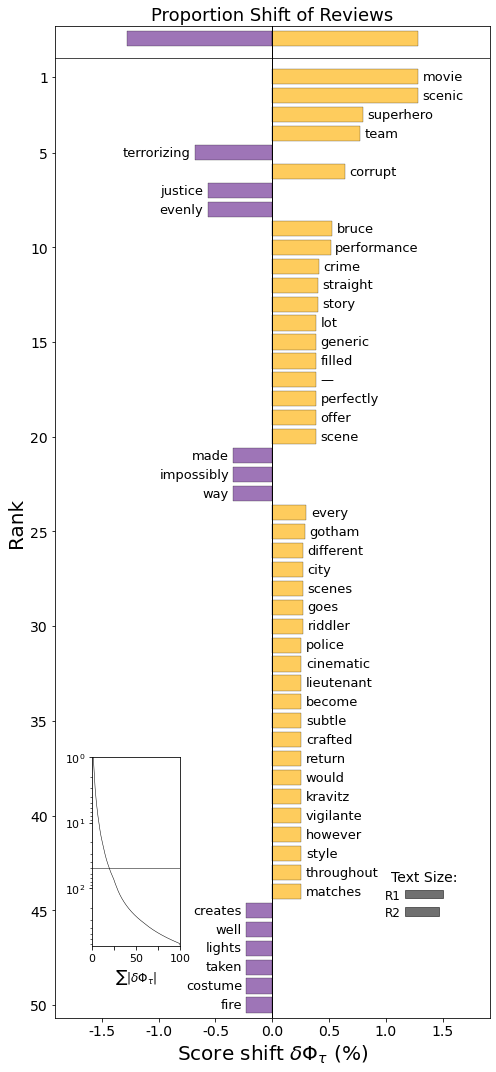

<AxesSubplot:title={'center':'Proportion Shift of Reviews'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [80]:
proportion_shift = sh.ProportionShift(type2freq_1=type2freq_1,
                                      type2freq_2=type2freq_2)
proportion_shift.get_shift_graph(system_names = ['R1', 'R2'],
                                 title='Proportion Shift of Reviews')

/Users/suvivarshney/opt/anaconda3/lib/python3.8/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


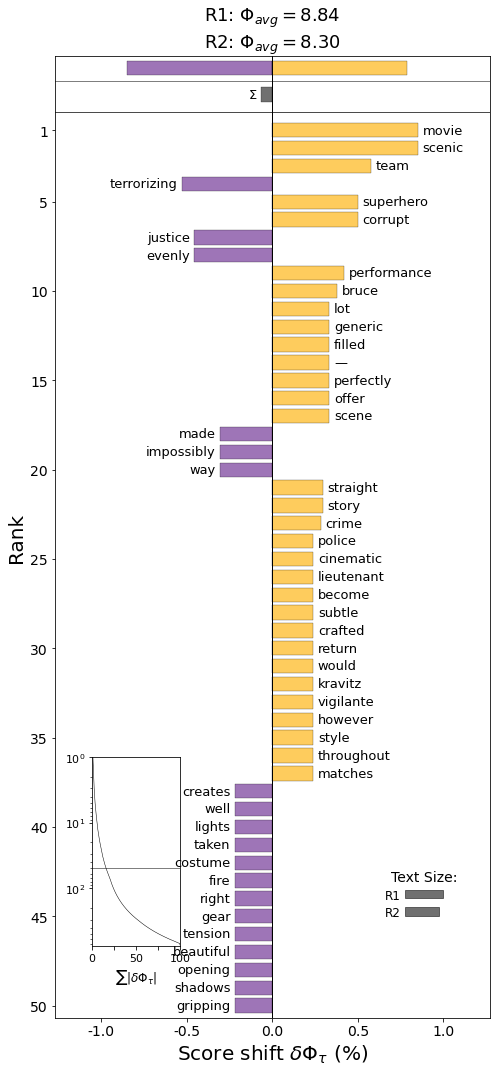

<AxesSubplot:title={'center':'R1: $\\Phi_{avg}=$8.84\nR2: $\\Phi_{avg}=$8.30'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [81]:
entropy_shift = sh.EntropyShift(type2freq_1=type2freq_1,
                                type2freq_2=type2freq_2,
                                base=2)
entropy_shift.get_shift_graph(system_names = ['R1', 'R2'])

/Users/suvivarshney/opt/anaconda3/lib/python3.8/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


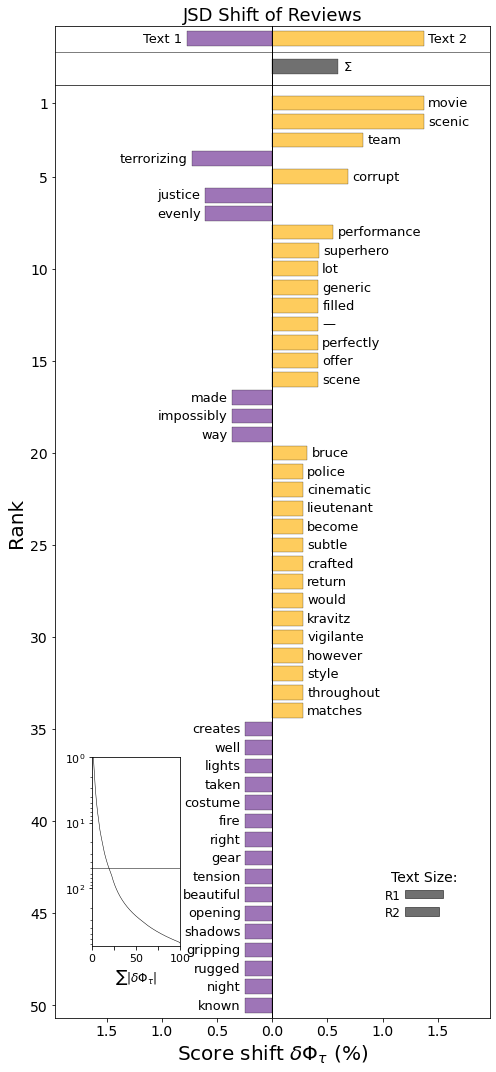

<AxesSubplot:title={'center':'JSD Shift of Reviews'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [82]:
jsd_shift = sh.JSDivergenceShift(type2freq_1=type2freq_1,
                                 type2freq_2=type2freq_2,
                                 weight_1=0.5,
                                 weight_2=0.5,
                                 base=2,
                                 alpha=1)
jsd_shift.get_shift_graph(system_names = ['R1', 'R2'],
                          title='JSD Shift of Reviews')

## Assignment 5

In [83]:
strA1= 'The goal of this study is to support human-in-the-loop, example-based graph pattern search in a graph database containing hundreds to thousands of distinct graphs. Based on graph representation learning, the authors offer a novel framework for interactive visual graph pattern search. On the basis of the presented framework, they create the visual analytics system called GraphQ. There are 3 major contributions by the authors of this paper 1. Presented a visual analytics platform for human-in-the-loop, example-based graph pattern search using graph representation learning. 2. Presented a unique technique (NeuroAlign) for pairwise node-alignment based on graph representation learning that gives 10x-100x faster results than the baseline combinatorial algorithm and 19%-29% more accurate results than the previous deep learning-based approach. 3. Presented, GraphQ, a prototype implementation of the framework that includes interactive query specification, query result presentation with different levels of detail, and user feedback methods for query refining. Also provided two use examples demonstrating the wide applicability and efficacy of the proposed solution. Histograms or scatterplots are used to depict the distribution of important graph statistics. Semantic scene graphs are used to reference the relevant literature in computer vision. Directed acyclic graphs are also used to represent query results. Graph neural networks (GNNs) are used in this research to encode topological and node attribute information in a graph as fixed-length vectors. They used two distinct GNNs to solve 1) the decision problem of determining whether a query pattern exists in a graph and 2) the node-alignment problem of determining the one-to-one node correspondence between the query pattern and the query targets. The frameworks essential components are the two GNNs, NeuroMatch and NeuroAlign. NeuroAlign intuitive and explainable visual signals are combined with unique visual and interaction designs to assist users in navigating the retrieval results and extracting insights. When compared to the baseline combinatorial Hungarian algorithm, NeuroAlign provides the result 10x-100x faster. They also provide results with 19-29% more accuracy as compared to the existing deep learning-based approach. NeuroAligns training and inference currently focus only on a single instance of subgraph isomorphism. In reality, however, the query nodes may be mapped to many groups of nodes in the same matched target network. The authors discovered that hard negative samples are essential for achieving a high accuracy rate during NeuroMatch training. To be sure that the subgraph link does not exist, sampled or perturbed queries must be checked using exact matching methods which are time-consuming to compute. At the moment, this technique works with undirected or connected graphs as the query pattern. More studies can be done to add node alignment for multiple subgraph isomorphism. The current approach may be improved to be more scalable to very large query graphs. Further work may be done to make it capable of handling directed or unconnected query patterns. In addition, given the great diversity of graph-structured data, the present work can be expanded to include other usage scenarios such as social network analysis. In unidirectional graphs, the vector embeddings will have one additional dimension. So how will this be handled by this GNN algorithm?'

In [84]:
strA2 ='The paper aims to support interactive graph pattern search by providing a visual analytics framework using graph representational learning. They utilize existing Graph Neural Networks (GNNs) for subgraph creation, decision, and node alignment, essentially converting them to high dimensional fixed length vectors. This allows their methods to scale the search as the graph scales. In GNNs, they propose a novel, NeuroAlign method for node alignment. The visual implementation of their system, GraphQ, is able to provide query and result modification through visual interaction. The outline of the contributions are: 1 They come up with a visual analytics system for human-in-the-loop, example-based graph pattern search using graph representational learning. 2 Node-alignment is done through a novel approach, NeuroAlign, which they claim is 10-100 x faster than the baseline combination algorithms. 3 The framework is implemented is called GraphQ, which provides an interactive query display supporting modification based on visual results. GhaphQ consists of 5 major parts: 1 Query editing panel which represents the subparts of the query and their interrelation to each other using a graph. Here we can modify the query. 2 Query result panel displaying an overview of all the sub-graphs which are the result of a query and the user-selected sub-graph in detail. 3 A statistics and filtering panel helps the user to visualize the statistics of the query results using scatterplots, bar-graphs, and tabular format. 4 A toggle switch panel to enable/disable fuzzy matching and to highlight/unhighlight the matches. 5 A popup window to compare the structure of the query and the structure of the matched graphs visually. The graph matching problem is solved by two GNN frameworks, NeuroMatch and the novel NeuroAlign. NeuroMatch decomposes the query and the graph into several subregions for an effective search. NeroAlign is used to improve node alignment, by working on fixed-length embeddings. The output from the NeuroAlign is passed to a multi-layer preceptron which takes a pair of embeddings and returns a similarity score. This is also useful when the user wants to perform a fuzzy match in addition to an exact match. 1 The authors encode the topology and nodes of a graph into fixed-length vectors. Then the graph search essentially is a high dimension vector comparison problem, much cheaper to solve. 2 To achieve an efficient node-alignment, they propose novel NeuroAlign, which is 10-100 x faster than combination algorithms and 19-29% more accurate than existing deep learning graph search algorithms. 3 GraphQ helps the user to visually interact with the query structure and the results and to modify them using visual assistance. VI. Shortcomings 1 NeuroAlign currently isolates only isolates subgraphs isomorphic to the query in a single graph. However, in practice, we have multidimensional graphs, where more than one subgraph can match the query. 2 NeuroMatch, an integral part of GraphQ, is often slow in large, densely connected graphs. This problem amplifies when it has to search all the subgraphs even when they are not an exact match. 3 The algorithm is only available for undirected graph since the current backbone of GNN do not support directed graphs. VII. Future Work The authors plan to extend the application to index-based search in graph databases, searching on the index embeddings to achieve sub-linear time performance. Further, this implementation could also be extended to highly dense social media networks and 3D point clouds. As we have seen in many visualization projects focusing on interactive graph searching algorithms, they focus on the path taken to discover relevant nodes. Will such a visualization be helpful? Will it help to debug complex queries?'

In [85]:
unwanted_chars = ".,-_\'?)(;\"$:"
unwanted_chars_list = ['.',',','-','_','\'','?','\\','/','\"','(',')',';','$','#','”','“','','-','a','s','t','re','n\'t','II','1','2','3','4','5','6','7','8','9','0','']
tmp = strA1.lower()
tmp = tmp.strip(unwanted_chars)
text_tokens = word_tokenize(tmp)
tokens_without_sw = [word for word in tqdm.tqdm(text_tokens) if not word in stopwords.words() and not word in unwanted_chars_list]
type2freq_1 = {}
for raw_word in tokens_without_sw:
    word = raw_word.strip(unwanted_chars)
    if word not in type2freq_1:
        type2freq_1[word] = 0 
    type2freq_1[word] += 1

100%|██████████| 562/562 [00:01<00:00, 342.46it/s]


In [86]:
unwanted_chars = ".,-_\'?)(;\"$:"
unwanted_chars_list = ['.',',','-','_','\'','?','\\','/','\"','(',')',';','$','#','”','“','','-','a','s','t','re','n\'t','II','1','2','3','4','5','6','7','8','9','0','']
tmp = strA2.lower()
tmp = tmp.strip(unwanted_chars)
text_tokens = word_tokenize(tmp)
tokens_without_sw = [word for word in tqdm.tqdm(text_tokens) if not word in stopwords.words() and not word in unwanted_chars_list]
type2freq_2 = {}
for raw_word in tokens_without_sw:
    word = raw_word.strip(unwanted_chars)
    if word not in type2freq_2:
        type2freq_2[word] = 0 
    type2freq_2[word] += 1

100%|██████████| 657/657 [00:01<00:00, 338.55it/s]


/Users/suvivarshney/opt/anaconda3/lib/python3.8/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


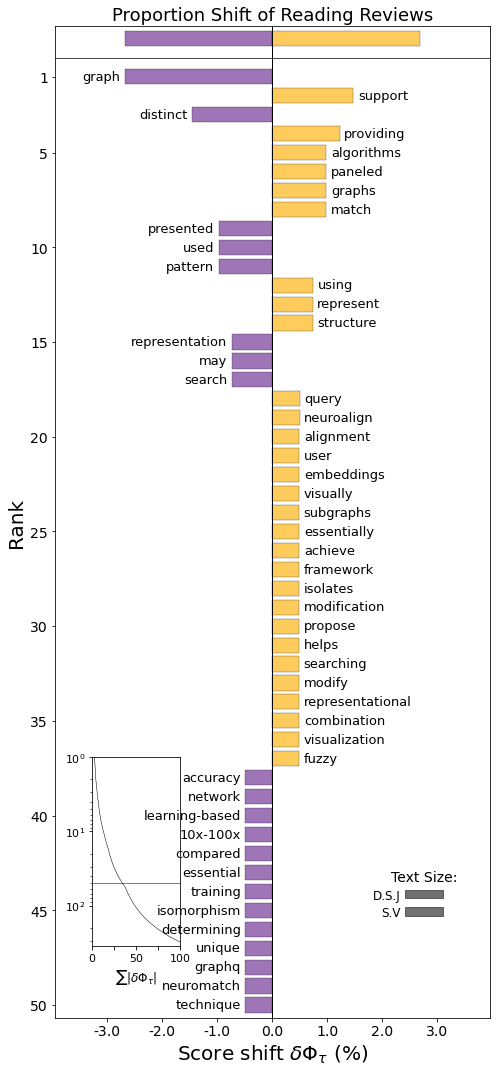

<AxesSubplot:title={'center':'Proportion Shift of Reading Reviews'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [104]:
proportion_shift = sh.ProportionShift(type2freq_1=type2freq_1,
                                      type2freq_2=type2freq_2)
proportion_shift.get_shift_graph(system_names = ['D.S.J', 'S.V'],
                                 title='Proportion Shift of Reading Reviews')

/Users/suvivarshney/opt/anaconda3/lib/python3.8/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


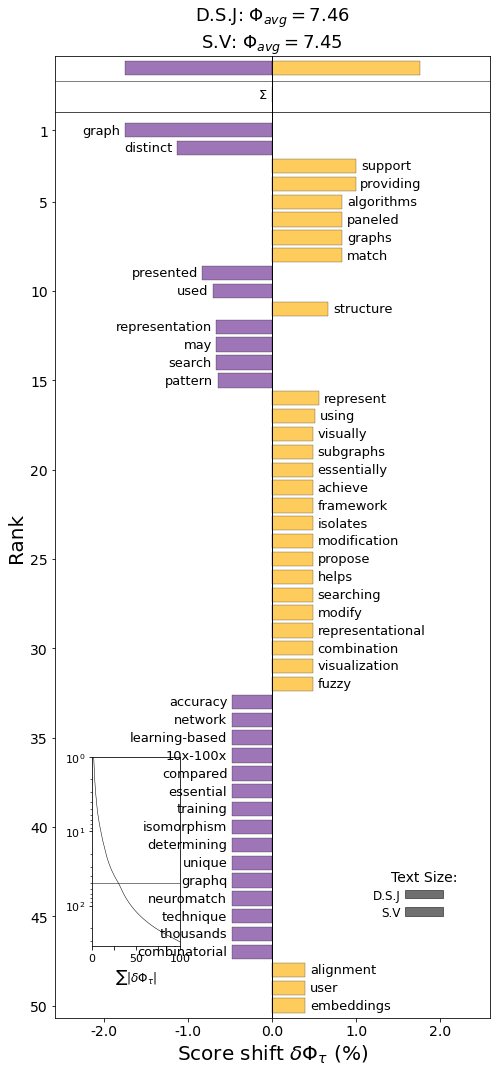

<AxesSubplot:title={'center':'D.S.J: $\\Phi_{avg}=$7.46\nS.V: $\\Phi_{avg}=$7.45'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [105]:
entropy_shift = sh.EntropyShift(type2freq_1=type2freq_1,
                                type2freq_2=type2freq_2,
                                base=2)
entropy_shift.get_shift_graph(system_names = ['D.S.J', 'S.V'])

/Users/suvivarshney/opt/anaconda3/lib/python3.8/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


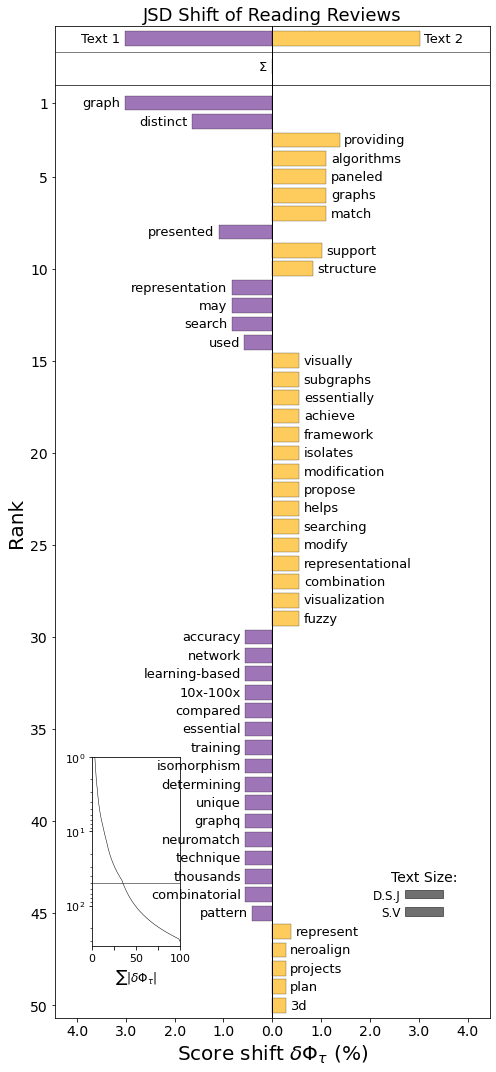

<AxesSubplot:title={'center':'JSD Shift of Reading Reviews'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [106]:
jsd_shift = sh.JSDivergenceShift(type2freq_1=type2freq_1,
                                 type2freq_2=type2freq_2,
                                 weight_1=0.5,
                                 weight_2=0.5,
                                 base=2,
                                 alpha=1)
jsd_shift.get_shift_graph(system_names = ['D.S.J', 'S.V'],
                          title='JSD Shift of Reading Reviews')